Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Download complete.
Dataset loaded successfully with correct headers.

First 5 rows of the correctly loaded dataset:


,Test Suite,Test Suite Start Time,Test Suite Duration,Test Suite Runs,Test Suite Assertions,Test Suite Failures,Test Suite Errors,Test Suite Skips,Build Number,Build Pull Request,Commit Sha,Build State,Build Start Time,Build Finish Time,Build Duration,Job Id,Job Start Time,Job Allow Failure
0,railties/test/app_rails_loader_test.rb,2016-03-24 19:01:23.0,0.035011,16,20,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
1,railties/test/application/asset_debugging_test.rb,2016-03-24 19:01:23.0,17.408814,2,9,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
2,railties/test/backtrace_cleaner_test.rb,2016-03-24 19:01:40.0,162.113491,30,116,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
3,railties/test/code_statistics_calculator_test.rb,2016-03-24 19:04:22.0,41.402265,2,7,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
4,railties/test/engine_test.rb,2016-03-24 19:05:03.0,2.786692,1,6,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN



Corrected Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594276 entries, 0 to 3594275
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Test Suite             object 
 1   Test Suite Start Time  object 
 2   Test Suite Duration    float64
 3   Test Suite Runs        int64  
 4   Test Suite Assertions  int64  
 5   Test Suite Failures    int64  
 6   Test Suite Errors      int64  
 7   Test Suite Skips       int64  
 8   Build Number           int64  
 9   Build Pull Request     bool   
 10  Commit Sha             object 
 11  Build State            object 
 12  Build Start Time       object 
 13  Build Finish Time      float64
 14  Build Duration         int64  
 15  Job Id                 object 
 16  Job Start Time         bool   
 17  Job Allow Failure      float64
dtypes: bool(2), float64(3), int64(7), object(6)
memory usage: 445.6+ MB

Converting timestamp columns to datetime objects...

Plotting

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


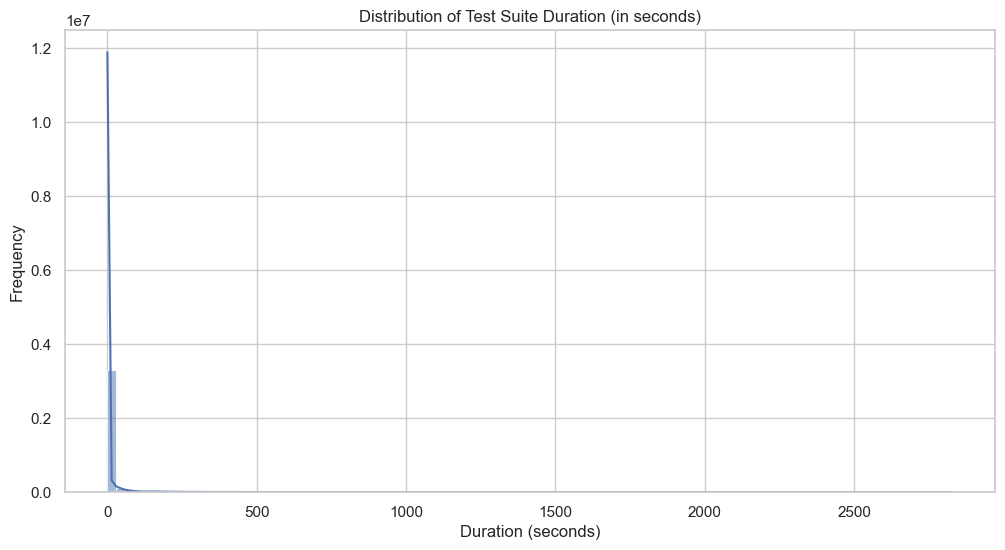

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


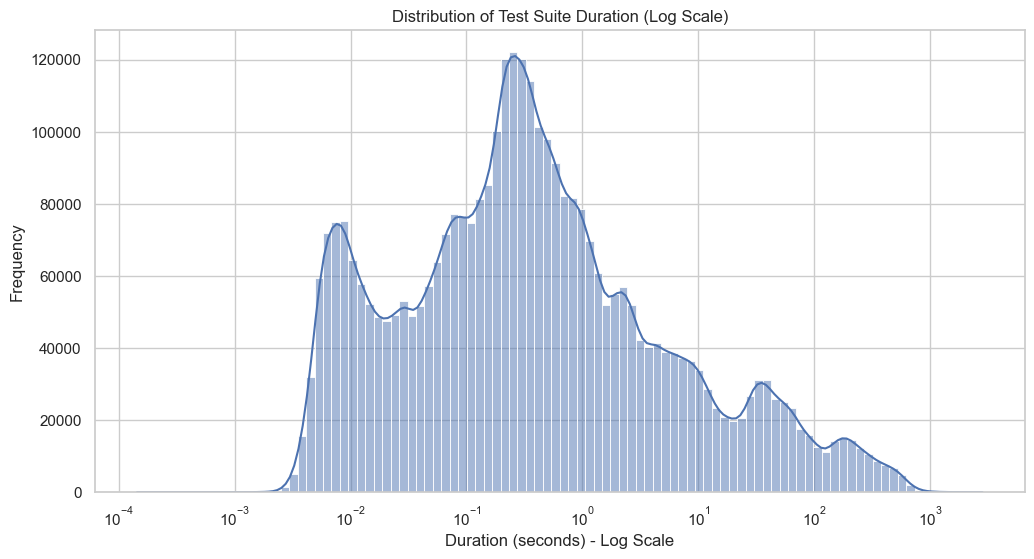

In [12]:
# Cell 1: CORRECTED - Installs, Downloads, and Data Loading/Cleaning

# Step 0: Install necessary libraries
%pip install requests pandas matplotlib seaborn
%pip install joblib

import requests
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- The Fix is Here ---
# Step 1: Define the correct column names based on the dataset's documentation
column_names = [
    'Test Suite', 'Test Suite Start Time', 'Test Suite Duration',
    'Test Suite Runs', 'Test Suite Assertions', 'Test Suite Failures',
    'Test Suite Errors', 'Test Suite Skips', 'Build Number',
    'Build Pull Request', 'Commit Sha', 'Build State',
    'Build Start Time', 'Build Finish Time', 'Build Duration',
    'Job Id', 'Job Start Time', 'Job Allow Failure'
]

# Step 2: Download the dataset
url = 'https://github.com/elbaum/CI-Datasets/raw/master/RailsCleanData.out.zip'
print(f"Downloading dataset from {url}...")
r = requests.get(url)
r.raise_for_status()
print("Download complete.")

# Step 3: Unzip and load the data, providing the correct headers
z = zipfile.ZipFile(io.BytesIO(r.content))
file_name = z.namelist()[0]

# Use header=None and names=column_names to load correctly
df = pd.read_csv(z.open(file_name), sep=';', header=None, names=column_names)
print("Dataset loaded successfully with correct headers.")

# --- Resume our Analysis ---

# Step 4: Initial Exploration
print("\nFirst 5 rows of the correctly loaded dataset:")
display(df.head())

print("\nCorrected Dataset Information:")
df.info()

# Step 5: Data Cleaning (Type Conversion)
print("\nConverting timestamp columns to datetime objects...")
for col in ['Test Suite Start Time', 'Build Start Time', 'Build Finish Time', 'Job Start Time']:
    df[col] = pd.to_datetime(df[col], errors='coerce') # 'coerce' will turn any parsing errors into NaT (Not a Time)

# Step 6: Visualization
print("\nPlotting the distribution of Test Suite Duration...")
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['Test Suite Duration'], bins=100, kde=True)
plt.title('Distribution of Test Suite Duration (in seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plotting on a log scale to handle skew
plt.figure(figsize=(12, 6))
# Filter out zero or negative durations, and also any NaN values that may exist
valid_durations = df['Test Suite Duration'].dropna()
sns.histplot(valid_durations[valid_durations > 0], bins=100, log_scale=True, kde=True)
plt.title('Distribution of Test Suite Duration (Log Scale)')
plt.xlabel('Duration (seconds) - Log Scale')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Cell 2: Display the head of the DataFrame
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Test Suite,Test Suite Start Time,Test Suite Duration,Test Suite Runs,Test Suite Assertions,Test Suite Failures,Test Suite Errors,Test Suite Skips,Build Number,Build Pull Request,Commit Sha,Build State,Build Start Time,Build Finish Time,Build Duration,Job Id,Job Start Time,Job Allow Failure
0,railties/test/app_rails_loader_test.rb,2016-03-24 19:01:23,0.035011,16,20,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08,1970-01-01 00:00:00.001245,118308786,2016-03-24 18:42:35.0,NaT,NaN
1,railties/test/application/asset_debugging_test.rb,2016-03-24 19:01:23,17.408814,2,9,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08,1970-01-01 00:00:00.001245,118308786,2016-03-24 18:42:35.0,NaT,NaN
2,railties/test/backtrace_cleaner_test.rb,2016-03-24 19:01:40,162.113491,30,116,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08,1970-01-01 00:00:00.001245,118308786,2016-03-24 18:42:35.0,NaT,NaN
3,railties/test/code_statistics_calculator_test.rb,2016-03-24 19:04:22,41.402265,2,7,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08,1970-01-01 00:00:00.001245,118308786,2016-03-24 18:42:35.0,NaT,NaN
4,railties/test/engine_test.rb,2016-03-24 19:05:03,2.786692,1,6,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08,1970-01-01 00:00:00.001245,118308786,2016-03-24 18:42:35.0,NaT,NaN


In [14]:
#cell 3 Cell to debug the data's scale
print(df['Test Suite Duration'].describe())

count    3.594276e+06
mean     1.279381e+01
std      5.480294e+01
min      1.438390e-04
25%      5.601777e-02
50%      2.982474e-01
75%      1.780519e+00
max      2.830797e+03
Name: Test Suite Duration, dtype: float64


In [15]:
# Cell 4: Display summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Test Suite Start Time,Test Suite Duration,Test Suite Runs,Test Suite Assertions,Test Suite Failures,Test Suite Errors,Test Suite Skips,Build Number,Build Start Time,Build Finish Time,Build Duration,Job Start Time,Job Allow Failure
count,3594276,3.594276e+06,3.594276e+06,3.594276e+06,3.594276e+06,3.594276e+06,3.594276e+06,3.594276e+06,3594276,3594276,3.594276e+06,0,0.0
mean,2016-06-22 06:24:58.175044096,1.279381e+01,8.732300e+01,4.007687e+03,4.159391e-03,2.725222e-02,4.123431e-01,3.559764e+04,2016-06-22 03:18:29.055630080,1970-01-01 00:00:00.001727099,1.394079e+08,NaT,NaN
min,2016-03-24 19:00:04,1.438390e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.339100e+04,2016-03-24 19:22:08,1970-01-01 00:00:00.000089,1.183088e+08,NaT,NaN
25%,2016-05-14 08:20:46.750000128,5.601777e-02,4.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.464700e+04,2016-05-14 05:17:28,1970-01-01 00:00:00.001386,1.301684e+08,NaT,NaN
50%,2016-06-29 20:15:40.500000,2.982474e-01,9.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.571900e+04,2016-06-29 16:40:15,1970-01-01 00:00:00.001641,1.411059e+08,NaT,NaN
75%,2016-07-29 15:31:10,1.780519e+00,2.600000e+01,6.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.653400e+04,2016-07-29 14:50:18,1970-01-01 00:00:00.001959,1.483163e+08,NaT,NaN
max,2016-09-01 05:23:43,2.830797e+03,5.315000e+03,7.554450e+05,2.510000e+02,2.346000e+03,7.000000e+01,3.739100e+04,2016-08-31 23:15:23,1970-01-01 00:00:00.009682,1.566645e+08,NaT,NaN
std,NaN,5.480294e+01,4.952442e+02,5.033036e+04,3.430896e-01,3.284016e+00,4.301352e+00,1.129988e+03,NaN,NaN,1.069408e+07,NaN,NaN


Cleaned column names:
['Test Suite', 'Test Suite Start Time', 'Test Suite Duration', 'Test Suite Runs', 'Test Suite Assertions', 'Test Suite Failures', 'Test Suite Errors', 'Test Suite Skips', 'Build Number', 'Build Pull Request', 'Commit Sha', 'Build State', 'Build Start Time', 'Build Finish Time', 'Build Duration', 'Job Id', 'Job Start Time', 'Job Allow Failure']
------------------------------

Plotting the distribution of Test Suite Duration...


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


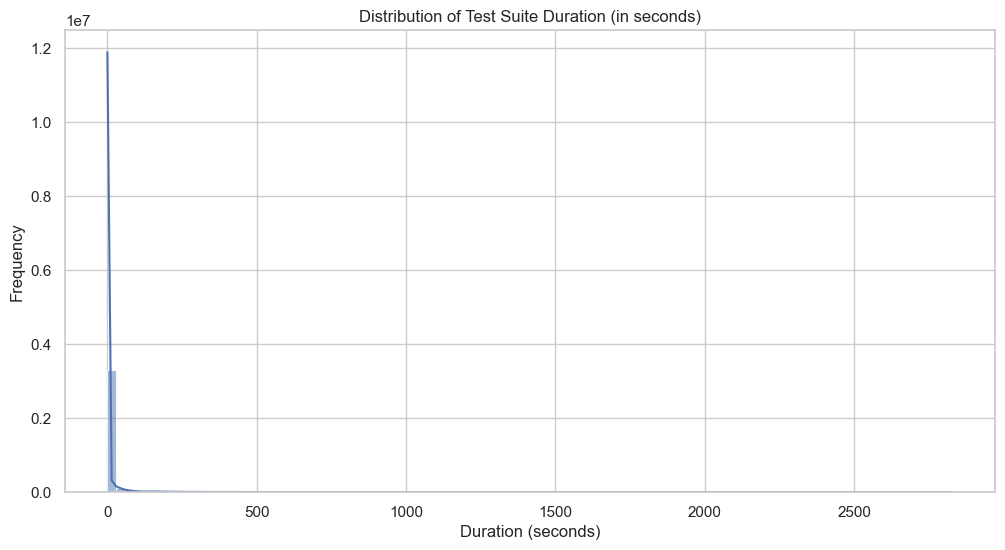

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


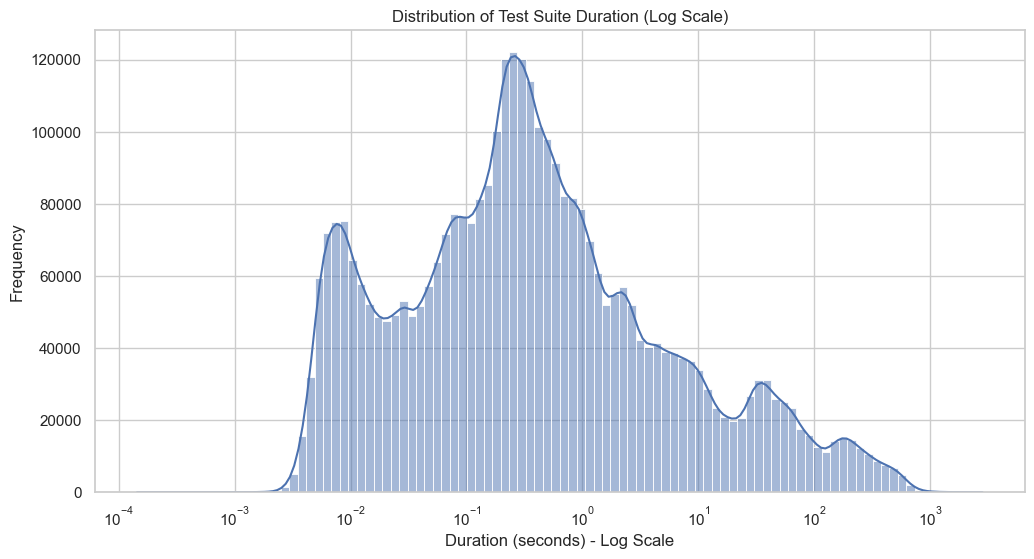

In [16]:
# Cell 4 (Corrected): Data Cleaning and Initial Visualization

# --- FIX: Clean up column names to remove leading/trailing spaces ---
df.columns = df.columns.str.strip()
# --------------------------------------------------------------------

# Let's print the actual column names to confirm the fix
print("Cleaned column names:")
print(df.columns.tolist())
print("-" * 30)

# Now, we retry the conversion and plotting
# Convert string columns to datetime objects
for col in ['Test Suite Start Time', 'Build Start Time', 'Build Finish Time']:
    df[col] = pd.to_datetime(df[col])

# Feature Engineering: Calculate total build duration in seconds
df['Build Duration Calc'] = (df['Build Finish Time'] - df['Build Start Time']).dt.total_seconds()

# Now, let's look at our primary target variable
print("\nPlotting the distribution of Test Suite Duration...")

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['Test Suite Duration'], bins=100, kde=True)
plt.title('Distribution of Test Suite Duration (in seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Since the distribution is likely skewed, let's also view it on a log scale
# We'll filter out zero or negative durations if they exist
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Test Suite Duration'] > 0]['Test Suite Duration'], bins=100, log_scale=True, kde=True)
plt.title('Distribution of Test Suite Duration (Log Scale)')
plt.xlabel('Duration (seconds) - Log Scale')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Cell 5: Find the correct column names
print(df.columns.tolist())

['Test Suite', 'Test Suite Start Time', 'Test Suite Duration', 'Test Suite Runs', 'Test Suite Assertions', 'Test Suite Failures', 'Test Suite Errors', 'Test Suite Skips', 'Build Number', 'Build Pull Request', 'Commit Sha', 'Build State', 'Build Start Time', 'Build Finish Time', 'Build Duration', 'Job Id', 'Job Start Time', 'Job Allow Failure', 'Build Duration Calc']


Plotting visualizations for durations less than 292.68 seconds (top 1% removed).


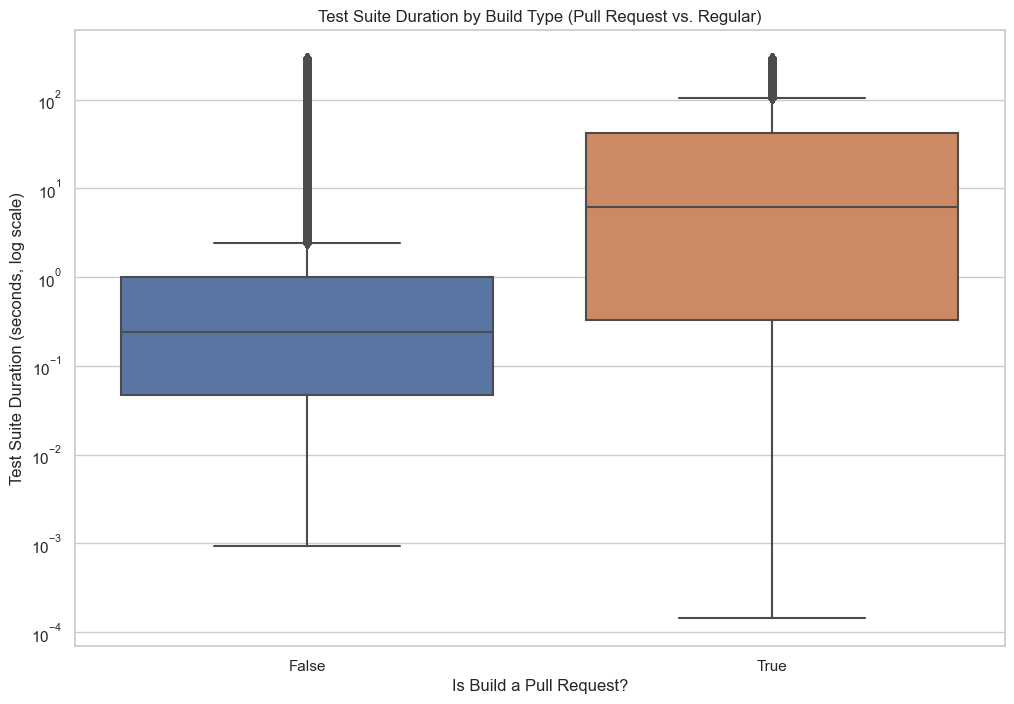

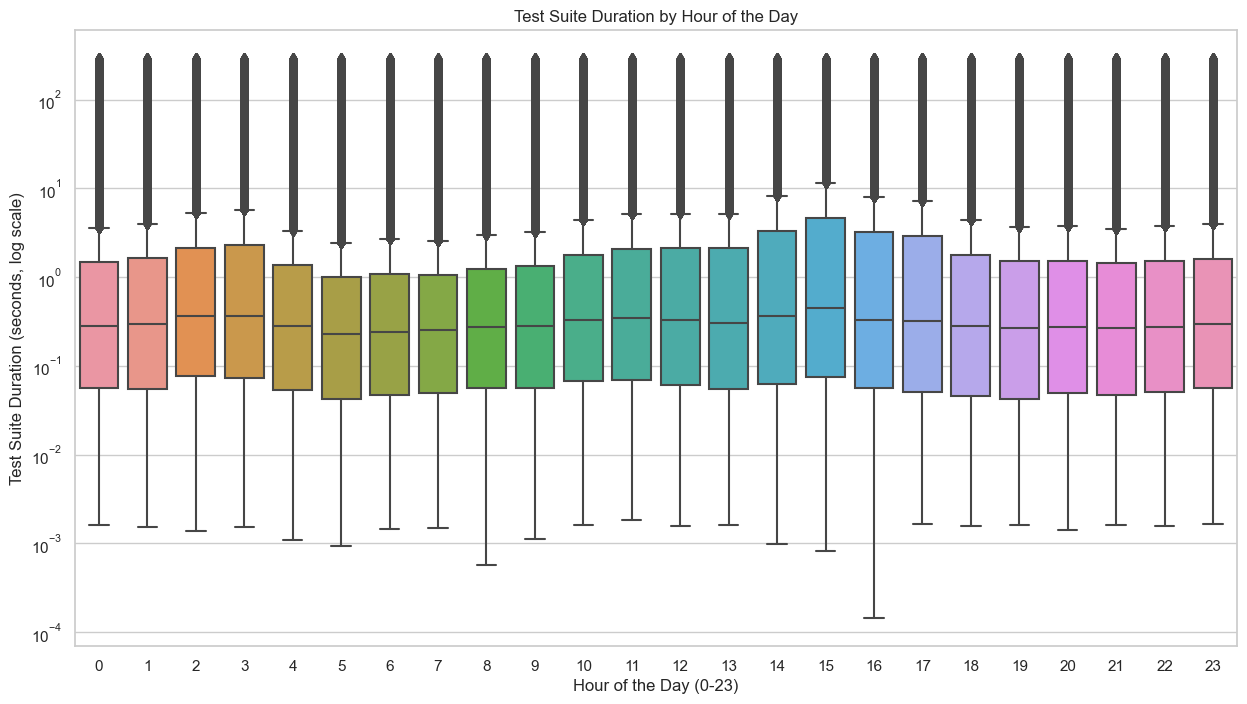

In [20]:
# Cell 6 (Finally Corrected): Feature Engineering and Exploratory Visualization

# Use the correct column name that exists in your dataset
df['start_day_of_week'] = df['Test Suite Start Time'].dt.dayofweek
df['start_hour_of_day'] = df['Test Suite Start Time'].dt.hour

# Use the quantile-based filter to remove extreme outliers for cleaner plots.
upper_bound = df['Test Suite Duration'].quantile(0.99)
df_filtered = df[df['Test Suite Duration'] < upper_bound]

print(f"Plotting visualizations for durations less than {upper_bound:.2f} seconds (top 1% removed).")

# --- Visualization 1: Pull Request vs. Regular Build Duration ---
plt.figure(figsize=(12, 8))
# --- FIX: Drop rows with missing values for the columns being plotted ---
plot_data_1 = df_filtered.dropna(subset=['Build Pull Request', 'Test Suite Duration'])
sns.boxplot(x='Build Pull Request', y='Test Suite Duration', data=plot_data_1)
plt.title('Test Suite Duration by Build Type (Pull Request vs. Regular)')
plt.yscale('log')
plt.xlabel('Is Build a Pull Request?')
plt.ylabel('Test Suite Duration (seconds, log scale)')
plt.show()

# --- Visualization 2: Duration by Hour of the Day ---
plt.figure(figsize=(15, 8))
# --- FIX: Drop rows with missing values for the columns being plotted ---
plot_data_2 = df_filtered.dropna(subset=['start_hour_of_day', 'Test Suite Duration'])
sns.boxplot(x='start_hour_of_day', y='Test Suite Duration', data=plot_data_2)
plt.title('Test Suite Duration by Hour of the Day')
plt.yscale('log')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Test Suite Duration (seconds, log scale)')
plt.show()

In [21]:
# Cell 7: Correct Feature Engineering and Train Model

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- 1. Corrected Feature Engineering ---
# The previous error was caused by using a non-existent column 'Job Start Time'.
# We will now correct this by using 'Test Suite Start Time' to create our time-based features.
print("Correcting feature engineering...")
time_col = 'Test Suite Start Time'
# Ensure the column is datetime type, coercing errors to NaT
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

# Create time-based features from the correct column
df['start_day_of_week'] = df[time_col].dt.dayofweek
df['start_hour_of_day'] = df[time_col].dt.hour
print("Time-based features 'start_day_of_week' and 'start_hour_of_day' have been created/corrected.")


# --- 2. Feature Selection & Data Prep ---
# Now we select the features and drop any rows with missing values in those columns or the target.
features = ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week']
target = 'Test Suite Duration'

# This will now work correctly as the time features are no longer all NaN.
df_model = df.dropna(subset=[target] + features).copy()

# A quick check to ensure we have data
if df_model.empty:
    print("\nError: The DataFrame is still empty after cleaning. Please check for issues in the source data.")
else:
    print(f"\nProceeding to model training with {len(df_model)} samples.")
    X = df_model[features]
    y = df_model[target]

    # --- 3. Train-Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {len(X_train)} samples")
    print(f"Testing set size: {len(X_test)} samples")


    # --- 4. Model Training ---
    print("\nTraining LightGBM model...")
    lgbm = lgb.LGBMRegressor(random_state=42)
    lgbm.fit(X_train, y_train)
    print("Model training complete.")


    # --- 5. Model Evaluation ---
    print("\nEvaluating model performance on the test set...")
    y_pred = lgbm.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\nMean Absolute Error (MAE): {mae:.4f} seconds")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f} seconds")
    print(f"R-squared (R²): {r2:.4f}")


Correcting feature engineering...
Time-based features 'start_day_of_week' and 'start_hour_of_day' have been created/corrected.

Proceeding to model training with 3594276 samples.
Training set size: 2875420 samples
Testing set size: 718856 samples

Training LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 2875420, number of used features: 3
[LightGBM] [Info] Start training from score 12.800218
Model training complete.

Evaluating model performance on the test set...

Mean Absolute Error (MAE): 17.7828 seconds
Root Mean Squared Error (RMSE): 51.9889 seconds
R-squared (R²): 0.0931


Adding 'Test Suite' as a categorical feature...
Proceeding to model training with 3594276 samples.

Training enhanced LightGBM model...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 2875420, number of used features: 4
[LightGBM] [Info] Start training from score 0.872477
Model training complete.

Evaluating enhanced model performance...

Mean Absolute Error (MAE): 4.5334 seconds
R-squared (R²): 0.7547

Plotting feat

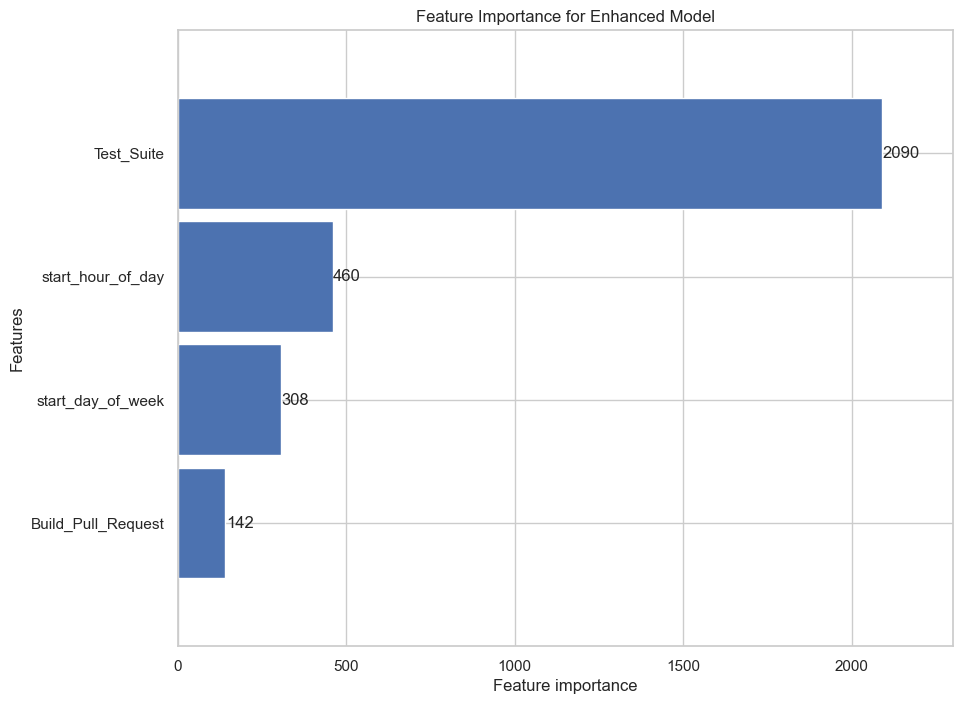

In [22]:
# Cell 8: Improving the Model with Categorical Features and Log Transform

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Enhanced Feature Engineering ---
# The single most important feature is the test suite itself.
# We will treat it as a categorical feature. LightGBM can handle this directly.
print("Adding 'Test Suite' as a categorical feature...")
df['Test Suite'] = df['Test Suite'].astype('category')

# We will also predict the log of the duration. This helps the model with skewed data.
df['Test Suite Duration Log'] = np.log1p(df['Test Suite Duration'])


# --- 2. Feature Selection & Data Prep ---
features = ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week', 'Test Suite']
target = 'Test Suite Duration Log' # Our new target

df_model_v2 = df.dropna(subset=[target] + features).copy()

print(f"Proceeding to model training with {len(df_model_v2)} samples.")
X = df_model_v2[features]
y = df_model_v2[target]

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 4. Model Training ---
print("\nTraining enhanced LightGBM model...")
# Note: We pass the categorical feature name to LightGBM
lgbm_v2 = lgb.LGBMRegressor(random_state=42)
lgbm_v2.fit(X_train, y_train, categorical_feature=['Test Suite'])
print("Model training complete.")


# --- 5. Model Evaluation ---
print("\nEvaluating enhanced model performance...")
y_pred_log = lgbm_v2.predict(X_test)

# Since we predicted the log, we need to convert back to original scale for interpretation
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# Calculate metrics on the original scale
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f} seconds")
print(f"R-squared (R²): {r2:.4f}")

# --- 6. Feature Importance ---
print("\nPlotting feature importances...")
lgb.plot_importance(lgbm_v2, height=0.9, figsize=(10,8))
plt.title("Feature Importance for Enhanced Model")
plt.show()


In [23]:
# Cell 9: Prepare and Export Data for Dashboard

import pandas as pd
import numpy as np

print("Preparing data for dashboard export...")

# Use our trained model (lgbm_v2) to make predictions on the ENTIRE dataset.
# This gives us a 'predicted_duration' for every job.
X_full = df_model_v2[features] # features are defined in the previous cell
full_pred_log = lgbm_v2.predict(X_full)

# Convert log predictions back to the original scale (seconds)
df_model_v2['predicted_duration'] = np.expm1(full_pred_log)

# Select the columns that will be useful for our dashboard
dashboard_df = df_model_v2[[
    'Test Suite Start Time',
    'Test Suite',
    'Test Suite Duration',
    'predicted_duration',
    'Build Pull Request',
    'start_hour_of_day',
    'start_day_of_week'
]].copy()

# For a more manageable dataset for the dashboard, we'll take a random 20,000 sample.
if len(dashboard_df) > 20000:
    dashboard_df_sample = dashboard_df.sample(n=20000, random_state=42)
else:
    dashboard_df_sample = dashboard_df

# Save the sampled dataframe to a CSV file.
output_filename = 'dashboard_data.csv'
dashboard_df_sample.to_csv(output_filename, index=False)

print(f"\nSuccessfully exported {len(dashboard_df_sample)} rows to {output_filename}")
print("This file will be used to power the MERN dashboard.")

dashboard_df_sample.head()

Preparing data for dashboard export...

Successfully exported 20000 rows to dashboard_data.csv
This file will be used to power the MERN dashboard.


,Test Suite Start Time,Test Suite,Test Suite Duration,predicted_duration,Build Pull Request,start_hour_of_day,start_day_of_week
623161,2016-05-05 07:59:48,activerecord/test/cases/associations_test.rb,0.007548,0.009654,False,7,3
2380104,2016-07-16 19:20:50,activesupport/test/core_ext/hash/transform_val...,2.484685,2.483321,False,19,5
3577422,2016-08-31 22:28:46,actionpack/test/controller/new_base/render_act...,0.335548,0.480922,False,22,2
2566474,2016-07-26 18:04:22,activemodel/test/cases/validations/numericalit...,0.316865,0.308328,False,18,1
2208653,2016-07-08 23:34:05,activerecord/test/cases/migration/foreign_key_...,0.055783,0.064914,False,23,4


In [26]:
# Cell 10
# Export the model for use in the web application
import joblib
import json

# Save the trained model
joblib.dump(lgbm_v2, 'pipeline_duration_model.pkl')
print("Model exported successfully!")

# Save feature information
model_info = {
    'features': features,
    'target': target,
    'categorical_features': ['Test Suite']
}
with open('model_info.json', 'w') as f:
    json.dump(model_info, f)
print("Model information saved!")

Model exported successfully!
Model information saved!


In [27]:
# Cell 11: Retrain Model Without Categorical Features (Fix for API)

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import joblib
import json

print("Retraining model without categorical features for API compatibility...")

# Use the same data preparation as before
features = ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week']
target = 'Test Suite Duration Log'

df_model_v3 = df.dropna(subset=[target] + features).copy()

print(f"Training with {len(df_model_v3)} samples using only numerical features.")

X = df_model_v3[features]
y = df_model_v3[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model without categorical features
print("\nTraining LightGBM model without categorical features...")
lgbm_v3 = lgb.LGBMRegressor(random_state=42)
lgbm_v3.fit(X_train, y_train)
print("Model training complete.")

# Evaluate model
print("\nEvaluating model performance...")
y_pred_log = lgbm_v3.predict(X_test)

# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f} seconds")
print(f"R-squared (R²): {r2:.4f}")

# Export the new model
print("\nExporting new model...")
joblib.dump(lgbm_v3, 'pipeline_duration_model_v2.pkl')

# Save model info
model_info_v2 = {
    'features': features,
    'target': target,
    'categorical_features': [],  # No categorical features
    'model_version': 'v2',
    'performance': {
        'mae': mae,
        'r2': r2
    }
}

with open('model_info_v2.json', 'w') as f:
    json.dump(model_info_v2, f)

print("New model exported successfully!")
print("Files created:")
print("- pipeline_duration_model_v2.pkl")
print("- model_info_v2.json")

# Test prediction
print("\nTesting prediction with new model...")
test_input = pd.DataFrame([{
    'Build Pull Request': True,
    'start_hour_of_day': 10,
    'start_day_of_week': 0
}])

prediction_log = lgbm_v3.predict(test_input)[0]
prediction_seconds = np.expm1(prediction_log)
print(f"Test prediction: {prediction_seconds:.2f} seconds ({prediction_seconds/60:.2f} minutes)")

Retraining model without categorical features for API compatibility...
Training with 3594276 samples using only numerical features.

Training LightGBM model without categorical features...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 2875420, number of used features: 3
[LightGBM] [Info] Start training from score 0.872477
Model training complete.

Evaluating model performance...

Mean Absolute Error (MAE): 12.6832 seconds
R-squared (R²): -0.0086

Exporting new model...
New model exported successfully!
Files created:
- pipeline_duration_model_v2.pkl
- model_info_v2.json

Testing prediction with new model...
Test prediction: 9.33 seconds (0.16 

In [29]:
# Cell 13: Create Robust Model with Fallback for Unseen Test Suites

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import joblib
import json

print("Creating robust model with fallback for unseen test suites...")

# Prepare data with test suite feature
features = ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week', 'Test Suite']
target = 'Test Suite Duration Log'

df_model_v5 = df.dropna(subset=[target] + features).copy()

# Get the most common test suites (top 10) and create a mapping
test_suite_counts = df_model_v5['Test Suite'].value_counts()
top_test_suites = test_suite_counts.head(10).index.tolist()
print(f"Top 10 test suites: {top_test_suites}")

# Create a mapping function that handles unseen test suites
def encode_test_suite(test_suite_name, top_suites):
    """Encode test suite name, using 'other' for unseen names"""
    if test_suite_name in top_suites:
        return test_suite_name
    else:
        return 'other'

# Apply encoding
df_model_v5['Test Suite Encoded'] = df_model_v5['Test Suite'].apply(
    lambda x: encode_test_suite(x, top_test_suites)
)

# Create one-hot encoding for test suites
test_suite_dummies = pd.get_dummies(df_model_v5['Test Suite Encoded'], prefix='test_suite')

# Combine with other features
df_model_v5_encoded = pd.concat([
    df_model_v5[['Build Pull Request', 'start_hour_of_day', 'start_day_of_week']],
    test_suite_dummies
], axis=1)

# Get feature names
feature_names = df_model_v5_encoded.columns.tolist()

print(f"Final features: {feature_names}")
print(f"Training with {len(df_model_v5_encoded)} samples.")

X = df_model_v5_encoded
y = df_model_v5[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
print("\nTraining robust LightGBM model...")
lgbm_v5 = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
lgbm_v5.fit(X_train, y_train)
print("Model training complete.")

# Evaluate model
print("\nEvaluating robust model performance...")
y_pred_log = lgbm_v5.predict(X_test)

# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f} seconds")
print(f"R-squared (R²): {r2:.4f}")

# Export the robust model
print("\nExporting robust model...")
joblib.dump(lgbm_v5, 'pipeline_duration_model_v4.pkl')

# Save model info with encoding details
model_info_v4 = {
    'features': feature_names,
    'target': target,
    'model_version': 'v4',
    'performance': {
        'mae': mae,
        'r2': r2
    },
    'test_suite_encoding': {
        'top_test_suites': top_test_suites,
        'encoding_function': 'encode_test_suite',
        'fallback_value': 'other'
    }
}

with open('model_info_v4.json', 'w') as f:
    json.dump(model_info_v4, f)

print("Robust model exported successfully!")
print("Files created:")
print("- pipeline_duration_model_v4.pkl")
print("- model_info_v4.json")

# Test prediction function
def predict_duration(is_pull_request, hour, day, test_suite):
    """Predict duration with robust test suite handling"""
    
    # Encode test suite
    encoded_suite = encode_test_suite(test_suite, top_test_suites)
    
    # Create feature vector
    features_dict = {
        'Build Pull Request': is_pull_request,
        'start_hour_of_day': hour,
        'start_day_of_week': day
    }
    
    # Add test suite one-hot encoding
    for suite in top_test_suites + ['other']:
        features_dict[f'test_suite_{suite}'] = 1 if suite == encoded_suite else 0
    
    # Convert to DataFrame
    df_input = pd.DataFrame([features_dict])
    
    # Ensure correct column order
    df_input = df_input[feature_names]
    
    # Make prediction
    prediction_log = lgbm_v5.predict(df_input)[0]
    prediction_seconds = np.expm1(prediction_log)
    
    return prediction_seconds

# Test predictions
print("\nTesting predictions with different scenarios...")

test_scenarios = [
    {'Build Pull Request': True, 'start_hour_of_day': 10, 'start_day_of_week': 0, 'test_suite': top_test_suites[0] if top_test_suites else 'test/unit'},
    {'Build Pull Request': False, 'start_hour_of_day': 14, 'start_day_of_week': 2, 'test_suite': 'unknown_test_suite'},
    {'Build Pull Request': True, 'start_hour_of_day': 9, 'start_day_of_week': 1, 'test_suite': top_test_suites[1] if len(top_test_suites) > 1 else 'test/integration'}
]

for i, scenario in enumerate(test_scenarios, 1):
    prediction_seconds = predict_duration(
        scenario['Build Pull Request'],
        scenario['start_hour_of_day'],
        scenario['start_day_of_week'],
        scenario['test_suite']
    )
    
    print(f"Scenario {i}: {scenario['test_suite']} at {scenario['start_hour_of_day']}:00 on day {scenario['start_day_of_week']}")
    print(f"  PR: {scenario['Build Pull Request']}, Prediction: {prediction_seconds:.1f}s ({prediction_seconds/60:.2f}min)")

print("\nRobust model is ready for use!")

Creating robust model with fallback for unseen test suites...
Top 10 test suites: ['actionpack/test/controller/content_type_test.rb', 'railties/test/generators/task_generator_test.rb', 'activerecord/test/cases/associations_test.rb', 'activerecord/test/cases/attribute_methods/read_test.rb', 'activerecord/test/cases/attribute_decorators_test.rb', 'activerecord/test/cases/attribute_methods_test.rb', 'activerecord/test/cases/attributes_test.rb', 'activerecord/test/cases/base_test.rb', 'activerecord/test/cases/calculations_test.rb', 'activerecord/test/cases/attribute_set_test.rb']
Final features: ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week', 'test_suite_actionpack/test/controller/content_type_test.rb', 'test_suite_activerecord/test/cases/associations_test.rb', 'test_suite_activerecord/test/cases/attribute_decorators_test.rb', 'test_suite_activerecord/test/cases/attribute_methods/read_test.rb', 'test_suite_activerecord/test/cases/attribute_methods_test.rb', 'test_suite_act